In [2]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from sympy import *
init_printing()

## Conditioning and Independence ##

The key to recognizing that a density is a multivariate normal density is spotting that the function in the exponent is a quadratic. 

This observation leads to an important result: If $\mathbf{X}$ is multivariate normal then the conditional distribution of any subset of elements given any other subset of elements is also multivariate normal. 

You can see this by examining the exponents in the densities. 

To calculate the conditional density, we have to divide the joint density by the density of the given variables.
- The numerator has a quadratic in the exponent.
- The denominator has a quadratic in the exponent.
- In the exponent of the quotient there is the difference between the quadratics, which is also a quadratic.

Therefore, the conditional density is multivariate normal.

In the next chapter, we will develop a way of identifying the parameters of the resulting multivariate normal distribution. For now, you can use `SymPy` to find the density numerically. Here is an example in two dimensions.

### Conditional Density by `SymPy`##
Let $\mathbf{X} = [X_1, X_2]^T$ be bivariate normal with mean $\mathbf{0}$ and covariance matrix $\boldsymbol{\Sigma}$ given below. You can assume $\boldsymbol{\Sigma}$ is positive definite – in the next chapter you will see how to check.

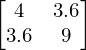

In [19]:
# A covariance matrix

Sigma = Matrix([[4, 3.6], [3.6, 9]])
Sigma

Then $X_1$ is normal $(0, 2^2)$, $X_2$ is normal $(0, 3^2)$, and $Cov(X_1, X_2) = 3.6$. In the cells below we have defined the density of $\mathbf{X}$ in the `SymPy` function `f_X`. 

In [31]:
# Centered multivariate normal density function
# with covariance matrix Sigma

declare('x_1')
declare('x_2')
x = Matrix([x_1, x_2])

f_X = (1/((2*pi) * (Sigma.det()**0.5))) * exp(-0.5 * (x.T * Sigma.inv() * x))

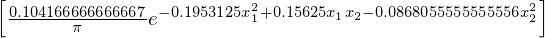

In [32]:
f_X

Note the quadratic in the exponent. 

Now suppose we want to find the conditional density of $X_2$ given $X_1 = x_1$. The density of $X_1$ at $x_1$ is

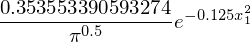

In [34]:
1/(((2 * pi) ** 0.5) * 2) * exp(-0.5 * (x_1 ** 2)/(2**2))

You can double check this by using `SymPy` to integrate the joint density. As in lab, we have used the `rearrange_1` function to simplify the expression. You can see that it is exactly the same as the normal density above.

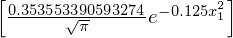

In [36]:
f_X_1 = Integral(f_X, (x_2, -oo, oo)).doit()
rearrange_1(f_X_1)

In [27]:
def divide(a, b):
    return a * (b ** -1)

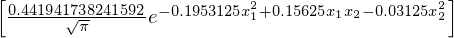

In [30]:
simplify(divide(f_X, f_X_2))

### Independence and the Covariance Matrix ###
If the elements of $\mathbf{X}$ are mutually independent then $Cov(X_i, X_j) = 0$ for all $i \ne j$ and hence the covariance matrix $\boldsymbol{\Sigma}$ is a diagonal matrix and the $i$th diagonal element is $Var(X_i)$.

In the other direction, for general joint distributions zero covariance doesn't imply independence, and pairwise independence doesn't imply mutual independence. But the multivariate normal is a wonderful distribution: 

If $\mathbf{X}$ is multivariate normal and its elements are pairwise uncorrelated – that is, $Cov(X_i, X_j) = 0$ for all 
$i \ne j$ – then the elements of $\mathbf{X}$ are mutually independent.

That is, **for the multivariate normal distribution, pairwise uncorrelatedness is the same as mutual independence.**

This is easy to see from the form of the density of $\mathbf{X}$. If $\boldsymbol{\Sigma}$ is a diagonal matrix then so is $\boldsymbol{\Sigma}^{-1}$. The $i$th diagonal element of $\boldsymbol{\Sigma}^{-1}$ is $1/\sigma_i^2$ where $\sigma_i^2 = Var(X_i)$. So

$$
(\mathbf{x} - \boldsymbol{\mu})\boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) ~ = ~ \sum_{i=1}^n \frac{(x_i - \boldsymbol{\mu}(i))^2}{\sigma_i^2}
$$
and therefore
$$
\exp\big{(} -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})\boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \big{)} ~ = ~ \prod_{i=1}^n \exp\big{(}-\frac{1}{2} \big{(}\frac{x_i - \boldsymbol{\mu}(i)}{\sigma_i}\big{)}^2\big{)}
$$

In the constant of integration, $\det(\boldsymbol{\Sigma}) = \sigma_1^2 \sigma_2^2 \cdots \sigma_n^2$.

Therefore the density of $\mathbf{X}$ is the product of the marginal normal densities.

### Indepedence of Sum and Difference ###
Let $\mathbf{X} = [X_1, X_2]^T$ have a bivariate normal distribution. Let $S = X_1 + X_2$ and $D = X_1 - X_2$. We know that $S$ and $D$ have a bivariate normal distribution and that

$$
Cov(S, D) ~ = ~ Var(X_1) - Var(X_2)
$$

If $X_1$ and $X_2$ have the same variance then $S$ and $D$ are uncorrelated, and hence also independent by what we have just proved.